In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [188]:
sales = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 18\Ironkaggle\validation_for students.csv')

In [189]:
sales.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [190]:
sales.dtypes

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [191]:
sales.shape

(71205, 9)

In [199]:
# code works for the sales df and not the validation
# sales['Unnamed: 0'].nunique() # this column needs to be set to index because it is the unique sales identifier

In [193]:
sales.set_index('index', inplace=True)

In [194]:
sales['store_ID'].nunique()

1115

In [195]:
sorted(sales['day_of_week'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [198]:
# code worked for the sales and not for the validation df, but I won't adapt it since I dropped the date column...
# sales['date'] = pd.to_datetime(sales['date'])

In [200]:
sunday_sales = sales[sales['day_of_week'] == 7]
sunday_sales.shape

(10147, 8)

In [202]:
# code worked for the sales df where the sales column were still part of the df
# sunday_sales['sales'].value_counts() # there are some Sundays where the stores where open

In [203]:
sunday_sales['open'].value_counts()

open
0    9897
1     250
Name: count, dtype: int64

In [204]:
saturday_sales = sales[sales['day_of_week'] == 6]
saturday_sales.shape

(10190, 8)

In [205]:
saturday_sales['open'].value_counts()

open
1    10143
0       47
Name: count, dtype: int64

In [206]:
# what is the percentage of open Saturdays on the total number of Saturdays?
90903 * 100 / 91075

99.81114466099369

In [207]:
# what is the percentage of open Sundays on the total number of Sundays?
2312 * 100 / 91075


2.5385671150150975

In [208]:
dict_count_days = dict(sales['day_of_week'].value_counts())
dict_count_days

{3: 10328, 6: 10190, 5: 10157, 4: 10155, 7: 10147, 1: 10126, 2: 10102}

In [209]:
print(dict_count_days.values())

dict_values([10328, 10190, 10157, 10155, 10147, 10126, 10102])


In [210]:
for day, count in dict_count_days.items():
  print(f'percentage of open days for {day}: ', sales[sales['day_of_week'] == day]['open'].value_counts()[1] * 100/ len(sales[sales['day_of_week'] == day]))

percentage of open days for 3:  97.21146398140976
percentage of open days for 6:  99.5387634936212
percentage of open days for 5:  94.9197597715861
percentage of open days for 4:  92.50615460364352
percentage of open days for 7:  2.463782398738543
percentage of open days for 1:  95.0523405095793
percentage of open days for 2:  99.10908730944368


In [115]:
# this may help to figure out how to correctly weight the variables in 'day_of_week'.

In [211]:
# Example code for creating a binary indicator for Sundays
sales['is_sunday'] = (sales['day_of_week'] == 7).astype(int)

In [212]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,is_sunday
index,,,,,,,,,
272371,415,7,01/03/2015,0,0,0,0,0,1
558468,27,7,29/12/2013,0,0,0,0,0,1
76950,404,3,19/03/2014,657,1,1,0,0,0
77556,683,2,29/01/2013,862,1,0,0,0,0
456344,920,3,19/03/2014,591,1,1,0,0,0


In [213]:
sales.is_sunday.value_counts()

is_sunday
0    61058
1    10147
Name: count, dtype: int64

In [214]:
sales['state_holiday'].value_counts()

state_holiday
0    69050
a     1405
b      475
c      275
Name: count, dtype: int64

In [231]:
sales[sales['state_holiday'] == 'a']['sales'].value_counts()

In [121]:
sales[sales['state_holiday'] == 'a']['sales'].unique()

array([    0,  5755,  2146, 10796,  8646, 12155,  4526,  1691,  1253,
        8830, 14376,  6971, 15416,  7640,  1010, 11122,  9726,  1869,
        4548, 16354,  6097,  3930, 10778,  6548,  6894,  7892,  2656,
       21623,  4901, 16644,  5812,  8929,  9466,  8347,  9053,  7646,
        1743,  7836, 11612,  9564,  7623,  2043, 12815,  5850,  4897,
        7266,  6707,  1459, 11035,  9804,  1285, 17317,  2188, 10616,
       13571,  1763,  3690,  7928, 10017,  6073, 13297, 10458,  9013,
        6091,  3346,  5371, 13018, 20872,  5564, 21407,  3704, 12206,
        9223, 14573,  8484, 16819,  7926,  9939, 14196,  7920,  7888,
        9168,  5807,  7097, 15432,  5450, 18106,  2936,  5656,  8365,
        3821, 14244,  6028,  1738,  6893, 20581, 19899,  3259,  7010,
       15170, 13216,  7560,  5665,  5705,  3102, 23749, 14634,  7741,
        7895,  4576,  5794,  8008, 11538,  7016,  5782, 10390, 13676,
       17765,  7727, 14568,  4723,  5658, 19159,  7088, 18787,  5173,
        6247,  8201,

In [122]:
sales[sales['state_holiday'] == 'b']['sales'].value_counts()

sales
0        4112
18913       1
10377       1
8514        1
5262        1
         ... 
2919        1
4001        1
7319        1
10440       1
6511        1
Name: count, Length: 103, dtype: int64

In [123]:
sales[sales['state_holiday'] == 'b']['sales'].unique()

array([    0,  8423, 13069, 20449,  7577, 14139,  1298, 12546,  6137,
        9654,  7247,  8364, 13619,  7432, 33326,  8093, 16759,  1318,
        6532, 30848, 17267, 14274,  9962,  3242, 38722, 35909,  3953,
       14736, 10440,  7319,  4001,  2919, 13738, 10489,  8846,  1404,
       17112, 11440,  4286,  3531,  1913,  1509,  6476,  1333,  2091,
       18431,  1519,  9293,  1804,  6073,  1192, 13518, 12603, 22413,
       18574,  1250, 18243,  7114, 33655, 10775, 18042, 11476, 19220,
       11715,  2196, 18913, 16252,   960,  4028,  5207, 15047,  9236,
        1155,  5262,  8514, 10377, 20025,  8751, 14090, 11559,  8174,
       11343,  3883, 20397, 11143,  9135,  4534, 12288,  4178,  1293,
       36227,  7340,  4160,  1630,  3767,  8114,  3180, 15556,  2718,
       14565,  6533,  6983,  6511], dtype=int64)

In [124]:
sales[sales['state_holiday'] == 'c']['sales'].value_counts()

sales
0        2576
4657        1
5687        1
4146        1
12961       1
5242        1
6148        1
24245       1
8057        1
4712        1
6680        1
15400       1
8890        1
10666       1
3888        1
3277        1
5784        1
10895       1
7818        1
13376       1
10033       1
12074       1
7612        1
8513        1
5111        1
7138        1
13319       1
15117       1
3178        1
13954       1
14166       1
6127        1
3719        1
4601        1
11106       1
6575        1
1800        1
6147        1
32169       1
26756       1
16961       1
11745       1
7475        1
4696        1
17597       1
7832        1
15449       1
5424        1
9741        1
Name: count, dtype: int64

In [216]:
sales['holiday_a'] = (sales['state_holiday'] == 'a').astype(int)

In [217]:
sales['holiday_b'] = (sales['state_holiday'] == 'b').astype(int)

In [218]:
sales['holiday_c'] = (sales['state_holiday'] == 'c').astype(int)

In [219]:
sales['new_state_holiday'] = sales['state_holiday'].apply((lambda x: 1 if x == 'a' else x))

In [220]:
sales['new_state_holiday'] = sales['new_state_holiday'].apply((lambda x: 1 if x == 'b' else x))

In [221]:
sales['new_state_holiday'] = sales['new_state_holiday'].apply((lambda x: 1 if x == 'c' else x))

In [223]:
sales['new_state_holiday'].value_counts()

new_state_holiday
0    69050
1     2155
Name: count, dtype: int64

In [224]:
sales.drop(columns='state_holiday', inplace=True, axis=1)

In [225]:
sales.drop(columns='date', inplace=True, axis=1)

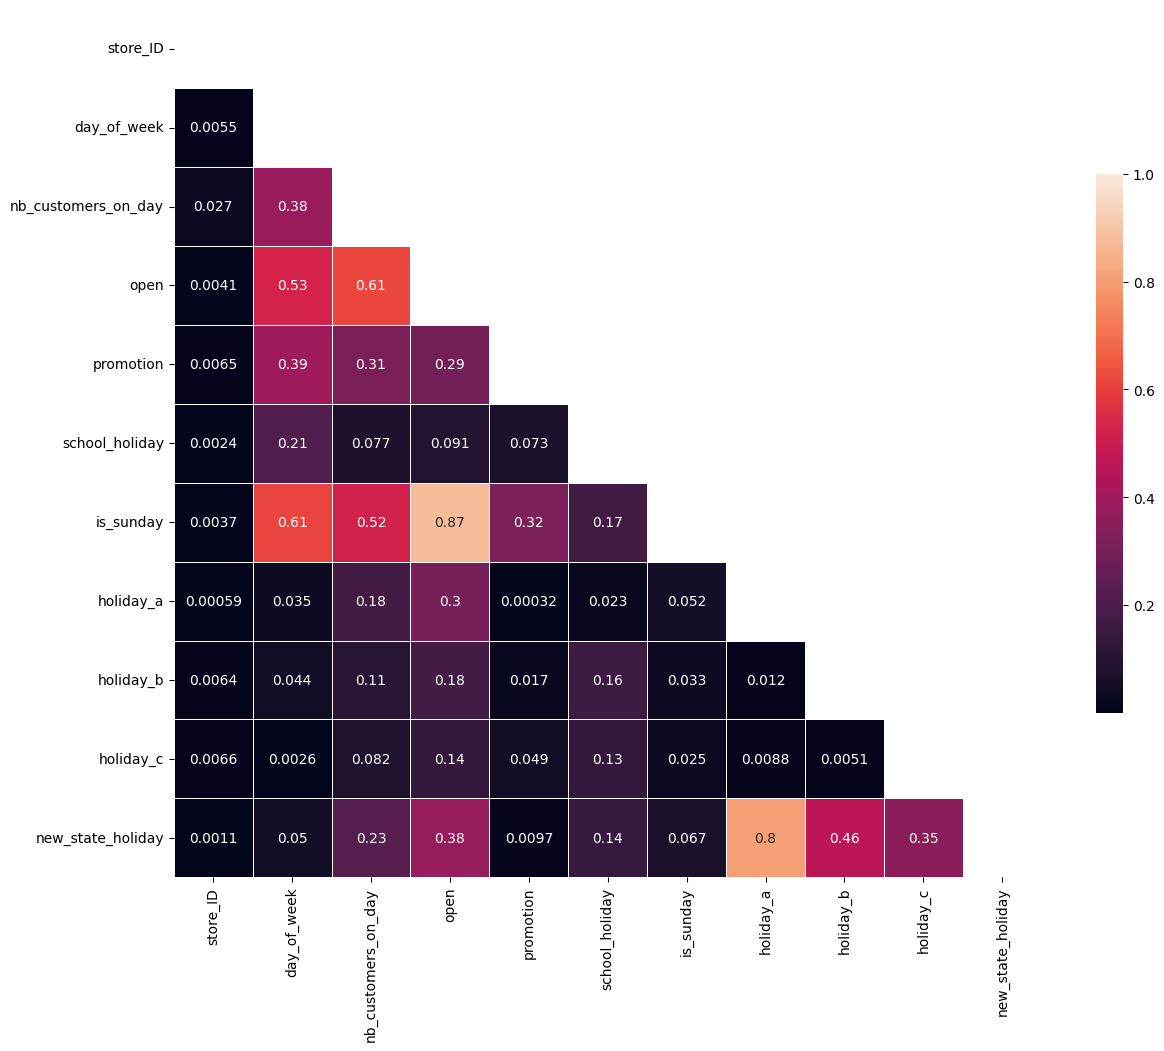

In [226]:
# I am first checking my features to see if I have to drop some highly correlated columns (with correlation above 0.90)
corr=np.abs(sales.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = corr)

plt.show()

In [227]:
sales.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
index,,,,,,,,,,,
272371,415,7,0,0,0,0,1,0,0,0,0
558468,27,7,0,0,0,0,1,0,0,0,0
76950,404,3,657,1,1,0,0,0,0,0,0
77556,683,2,862,1,0,0,0,0,0,0,0
456344,920,3,591,1,1,0,0,0,0,0,0


In [228]:
sales.to_csv('sales__validation_cleaned.csv', index=False)

In [229]:
sales.columns

Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'school_holiday', 'is_sunday', 'holiday_a', 'holiday_b', 'holiday_c',
       'new_state_holiday'],
      dtype='object')

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = sales.drop('sales', axis=1)
y = sales['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
print(X_train.shape)
print(X_test.shape)

(512672, 11)
(128168, 11)


In [140]:
display(X_train.head())

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
Unnamed: 0,,,,,,,,,,,
346971,275,3,680,1,1,0,0,0,0,0,0
351987,729,3,1125,1,0,0,0,0,0,0,0
67795,483,2,936,1,1,1,0,0,0,0,0
510737,11,2,938,1,1,1,0,0,0,0,0
160295,202,4,410,1,0,0,0,0,0,0,0


In [141]:
display(X_test.head())

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
Unnamed: 0,,,,,,,,,,,
173548,236,3,1081,1,1,0,0,0,0,0,0
645051,856,7,0,0,0,0,1,0,0,0,0
158198,407,2,346,1,1,0,0,0,0,0,0
188226,942,3,411,1,1,0,0,0,0,0,0
711780,917,2,673,1,0,0,0,0,0,0,0


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [143]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [144]:
X_train_scaled.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
0,-0.878803,-0.501156,0.100176,0.452212,1.272521,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
1,0.531580,-0.501156,1.058956,0.452212,-0.785842,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
2,-0.232636,-1.001913,0.651744,0.452212,1.272521,2.148327,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
3,-1.698938,-1.001913,0.656053,0.452212,1.272521,2.148327,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
4,-1.105583,-0.000399,-0.481556,0.452212,-0.785842,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617


In [145]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [146]:
X_test_scaled.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
0,-0.999959,-0.501156,0.964155,0.452212,1.272521,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
1,0.926115,1.501871,-1.364927,-2.211351,-0.785842,-0.465479,2.455887,-0.142626,-0.080942,-0.064454,-0.177617
2,-0.468736,-1.001913,-0.619448,0.452212,1.272521,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
3,1.193280,-0.501156,-0.479402,0.452212,1.272521,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617
4,1.115616,-1.001913,0.085094,0.452212,-0.785842,-0.465479,-0.407185,-0.142626,-0.080942,-0.064454,-0.177617


In [147]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [148]:
X_train_normalized = normalizer.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns)
X_train_normalized.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
0,0.245961,0.333333,0.124588,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.653501,0.333333,0.206119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.432675,0.166667,0.171491,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.008977,0.166667,0.171858,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.180431,0.500000,0.075119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns)
X_test_normalized.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
0,0.210952,0.333333,0.198058,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.767504,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.364452,0.166667,0.063393,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.844704,0.333333,0.075302,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.822262,0.166667,0.123305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
X_train_normalized.to_pickle('train_data.pkl')
y_train.to_pickle('train_label.pkl')

X_test_normalized.to_pickle('test_data.pkl')
y_test.to_pickle('test_label.pkl')

In [150]:
## Prep. work is  done. Modeling from now on

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [152]:
# Create linear regression
regr = LinearRegression()

# Train the linear regression for stardardized data
model_reg = regr.fit(X_train_scaled, y_train)
y_pred_reg = model_reg.predict(X_test_scaled)

In [153]:
# Train the linear regression for normalized data
model_reg2 = regr.fit(X_train_normalized, y_train)
y_pred_reg2 = model_reg.predict(X_test_normalized)

In [154]:
from sklearn.metrics import mean_squared_error, r2_score

mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)
print(f'Linear Regression standardized root_MSE: {np.sqrt(mse_reg)}, R-squared: {r2_reg}')

Linear Regression standardized root_MSE: 1481.3194088873993, R-squared: 0.8515520588098839


In [155]:
mse_reg2 = mean_squared_error(y_test, y_pred_reg2)
r2_reg2 = r2_score(y_test, y_pred_reg2)
print(f'Linear Regression normalized root_MSE: {np.sqrt(mse_reg)}, R-squared: {r2_reg}')

Linear Regression normalized root_MSE: 1481.3194088873993, R-squared: 0.8515520588098839


In [156]:
model_reg.coef_

array([-1.61593433e+02, -4.13511191e+02,  3.33101761e+04,  4.83261136e+02,
        1.27927344e+03,  5.80453510e+01, -1.02809811e+03, -3.34842425e+15,
       -3.34842425e+15, -3.34842425e+15,  3.34842425e+15])

In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.1, 1, 10]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
best_alpha = ridge_grid.best_params_['alpha']

In [158]:
from sklearn.linear_model import Ridge

# Assuming ridge_grid has already been fit using GridSearchCV
best_alpha = ridge_grid.best_params_['alpha']

# Create Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha)

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)
ridge_model.score(X_test_scaled, y_test)

0.8515523093486888

In [159]:
ridge_params2 = {'alpha': [0.1, 1, 10]}
ridge2 = Ridge()
ridge_grid2 = GridSearchCV(ridge2, ridge_params2, cv=5)
ridge_grid2.fit(X_train_normalized, y_train)
best_alpha2 = ridge_grid2.best_params_['alpha']

In [160]:
# Create Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha2)

# Fit the model to the scaled training data
ridge_model.fit(X_train_normalized, y_train)
ridge_model.score(X_test_normalized, y_test)

0.8515523575348999

In [161]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [162]:
y_pred_ridge2 = ridge_model.predict(X_test_normalized)

In [163]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Linear Ridgeression root_MSE: {np.sqrt(mse_ridge)}, R-squared: {r2_ridge}')

Linear Ridgeression root_MSE: 32106.95878008464, R-squared: -68.7389000737467


In [164]:
mse_ridge2 = mean_squared_error(y_test, y_pred_ridge2)
r2_ridge2 = r2_score(y_test, y_pred_ridge2)
print(f'Linear Ridgeression root_MSE: {np.sqrt(mse_ridge2)}, R-squared: {r2_ridge2}')

Linear Ridgeression root_MSE: 1481.3179184410412, R-squared: 0.8515523575348999


In [165]:
# Create decision tree classifer object
regr_tree = DecisionTreeRegressor()

# Train regression tree model
regr_tree.fit(X_train_scaled, y_train)

# Score the model
regr_tree.score(X_test_scaled, y_test)

0.946361986541016

In [166]:
# Train regression tree model for normalized data
regr_tree.fit(X_train_normalized, y_train)

# Score the model
regr_tree.score(X_test_normalized, y_test)

0.9464454319523772

In [167]:
y_pred_tree2 = regr_tree.predict(X_test_normalized)

In [168]:
mse_tree2 = mean_squared_error(y_test, y_pred_tree2)
r2_tree2 = r2_score(y_test, y_pred_tree2)
print(f'DecisionTreeRegressor root_MSE: {np.sqrt(mse_tree2)}, R-squared: {r2_tree2}')

DecisionTreeRegressor root_MSE: 889.7333799041944, R-squared: 0.9464454319523772


In [169]:
from sklearn.ensemble import VotingRegressor

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=1)

voting_reg = VotingRegressor(
estimators=[('lr', lin_reg), ('dt', tree_reg)])
voting_reg.fit(X_train_scaled, y_train)
print('Train score:', voting_reg.score(X_train_scaled, y_train))
print('Test score:', voting_reg.score(X_test_scaled, y_test))

Train score: 0.9631808890719123
Test score: 0.9353167790928832


In [170]:
# Define parameter grids for Ridge and DecisionTreeRegressor
param_grid_ridge = {'alpha': [0.1, 1, 10]}
param_grid_tree = {'max_depth': [None, 5, 10]}

ridge_reg = Ridge()
tree_reg = DecisionTreeRegressor()

# Create a grid search for Ridge
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train_normalized, y_train)

# Create a grid search for DecisionTreeRegressor
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=5, scoring='r2')
grid_search_tree.fit(X_train_normalized, y_train)

# Get the best hyperparameters for Ridge and DecisionTreeRegressor
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_max_depth_tree = grid_search_tree.best_params_['max_depth']

# Create a new VotingRegressor with the best hyperparameters
voting_reg_tuned = VotingRegressor(
    estimators=[('rd', Ridge(alpha=best_alpha_ridge)), ('dt', DecisionTreeRegressor(max_depth=best_max_depth_tree))])

# Fit the tuned model
voting_reg_tuned.fit(X_train_normalized, y_train)

# Print the scores
print('Train score:', voting_reg_tuned.score(X_train_normalized, y_train))
print('Test score:', voting_reg_tuned.score(X_test_normalized, y_test))


Train score: 0.9631808828028703
Test score: 0.9353126342516846


In [181]:
import pickle

In [183]:
with open('voting_reg_tuned.pkl', 'wb') as file:
    pickle.dump(voting_reg_tuned, file)

In [175]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(voting_reg_tuned, X_train_normalized, y_train, cv=10, scoring='r2')

# Display cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

Cross-Validation R-squared Scores: [0.93559027 0.93533811 0.93570386 0.9363337  0.93588019 0.93567172
 0.93607686 0.93660354 0.93328482 0.93426412]
Mean R-squared Score: 0.9354747177529046


In [172]:
# model not chosen
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, # same 10 trees
                               #max_samples=100,
                               #max_features=0.6,
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train_scaled, y_train)
print('Train score:', forest.score(X_train_scaled, y_train))
print('Test score:', forest.score(X_test_scaled, y_test))

Train score: 0.8171083649864864
Test score: 0.8175704334763318


In [173]:
# model not chosen
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, # same 10 trees
                               #max_samples=100,
                               #max_features=0.6,
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train_normalized, y_train)
print('Train score:', forest.score(X_train_normalized, y_train))
print('Test score:', forest.score(X_test_normalized, y_test))

Train score: 0.8171083649864864
Test score: 0.8175704334763318


In [232]:
sales_validation_normalized = normalizer.transform(sales)
sales_validation_normalized = pd.DataFrame(sales_validation_normalized,columns=sales.columns)
sales_validation_normalized.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,is_sunday,holiday_a,holiday_b,holiday_c,new_state_holiday
0,0.371634,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.023339,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.361759,0.333333,0.120374,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.612208,0.166667,0.157933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.824955,0.333333,0.108281,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
new_data_predictions = voting_reg_tuned.predict(sales_validation_normalized)  # Replace new_data_scaled with your new data

# Create a new column 'sales' in the DataFrame with the predictions
sales_validation_normalized['sales'] = new_data_predictions

# Display the DataFrame with the predicted sales column
print(new_data_predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sales


In [250]:
sales_validation_predictions = pd.DataFrame(sales_validation_normalized['sales'])

In [251]:
sales_validation_predictions.to_csv('sales.validation_predictions.csv', index=False)